In [9]:
import numpy as np
import scipy

# Numpy и Scipy 
## А что мы только что сделали в модуле выше?
Мы импортировали numpy и scipy - основные библиотеки для работы с численными даннами в python, это необходимо для работы с ними, поэтому **обязательно выполните cell выше**. Большая часть их функций совпадает/копирует функции matlab и наоборот. Также, определенная часть из этих функций - старые, но очень эффективные алгоритмы из C и Fortran обернутые в python (см. [f2py](https://docs.scipy.org/doc/numpy/f2py/)). Это позволяет python обходить тот факт, что это интерпретируемый язык и работать намного быстрее; быстроты добавляет и то, что большая часть из операций работает векторно и не использует циклы, а это в свою очередь быстрее из-за большого количество хитрых "хаков" и фокусов, например [этот ответ на стаковерфлоу](https://stackoverflow.com/questions/35091979/why-is-vectorization-faster-in-general-than-loops), [BLAS](https://en.wikipedia.org/wiki/Basic_Linear_Algebra_Subprograms) и [алгоритм Штрассена](https://en.wikipedia.org/wiki/Strassen_algorithm). Это позволяет ему конкурировать по скорости c Fortran и C. Одним из хороших примеров является [эта статья](https://modelingguru.nasa.gov/docs/DOC-1762), хоть и написанная около 10 лет назад, когда у numpy была гораздо меньшая аудитория и меньший арсенал методов.

## Основы массивов

Основой numpy являются `ndarray` - статические n-мерные массивы. 

In [10]:
np.info(np.ndarray) # напоминаю, что по каждой вещи можно получить хелп таким образом

 ndarray()

ndarray(shape, dtype=float, buffer=None, offset=0,
        strides=None, order=None)

An array object represents a multidimensional, homogeneous array
of fixed-size items.  An associated data-type object describes the
format of each element in the array (its byte-order, how many bytes it
occupies in memory, whether it is an integer, a floating point number,
or something else, etc.)

Arrays should be constructed using `array`, `zeros` or `empty` (refer
to the See Also section below).  The parameters given here refer to
a low-level method (`ndarray(...)`) for instantiating an array.

For more information, refer to the `numpy` module and examine the
methods and attributes of an array.

Parameters
----------
(for the __new__ method; see Notes below)

shape : tuple of ints
    Shape of created array.
dtype : data-type, optional
    Any object that can be interpreted as a numpy data type.
buffer : object exposing buffer interface, optional
    Used to fill the array with data.
of

Создание и основные параметры:

In [11]:
a = np.array([0, 1, 2, 3])
a

array([0, 1, 2, 3])

Размер массива:

In [12]:
print(a.shape) 

(4,)


In [13]:
len(a) # длина массива 

4

Массив побольше:

In [14]:
b = np.array([[0, 1, 2], [3, 4, 5]])
print(b)

[[0 1 2]
 [3 4 5]]


Соответсующий размер: 

In [15]:
print(b.shape)

(2, 3)


Заметьте, что здесь используется tuple - кортеж. Мы о нем не говорили, однако он используется достаточно редко. Если вам все же интересно, можете почитать о нем [здесь](https://pythonworld.ru/tipy-dannyx-v-python/kortezhi-tuple.html)

Интересно что длина массива даст неочевидный результат, а точнее его первое измерение:

In [16]:
len(b)

2

Существует целая армия разнообразных функций для создавания массивов, самые распространенные примеры:

In [17]:
print('zeros: ')
print(np.zeros([3, 3]))

print('ones:')
print(np.ones([3, 3]))

print('Единичная матрица:')
print(np.eye(3))

zeros: 
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
ones:
[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]
Единичная матрица:
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


Однако пожалуй самыми часто используемыми является создание массивов с заданным шагом:

In [18]:
np.arange(1, 5, 0.1)  # первое значение, последнее(не включительно!), шаг

array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2,
       2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5,
       3.6, 3.7, 3.8, 3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8,
       4.9])

И постоянного шага заданной длины:

In [19]:
c = np.linspace(1, 5, 10) # первое значение, последнее(на этот раз включительно), количество элементов
print(c)

[1.         1.44444444 1.88888889 2.33333333 2.77777778 3.22222222
 3.66666667 4.11111111 4.55555556 5.        ]


Вообще говоря, при создании массива можно указать тип данных, однако дефолтным является float64:

In [20]:
d = np.array([1, 2, 3], dtype=int)
print('Тип только что созданного массива:', d.dtype)
print('Тип массива саозданного в предыдущем cell-е:', c.dtype)

Тип только что созданного массива: int64
Тип массива саозданного в предыдущем cell-е: float64


## Индексирование массивов
Numpy позволяет делать еще больше фич с индексированием, которое иногда позволяет одной строчкой решать достаточно нетривиальные проблемы, однако, давайте сначала посмотрим на базовые примеры, например на получение столбца:

In [21]:
e = np.zeros([5, 5])
print(e)
print('\n')  # символ перехода на новую строку

e[:, 2] = 1
print(e)

[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


[[0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]]


Или даже так:

In [22]:
e[2, :] = np.arange(1, 6)
print(e, '\n')
print('Уже самостоятельный вектор:', e[2, :])

[[0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [1. 2. 3. 4. 5.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]] 

Уже самостоятельный вектор: [1. 2. 3. 4. 5.]


Пожалуй, самая клевая фича это бинарные(или булевые) маски. С помощью них можно хитрым образом индексировать массив, выбирая какие элементы нас интересуют:

In [23]:
a = np.random.randint(0, 21, 15)
print(a)

print(a % 3 == 0)


mask = (a % 3 == 0)  # выбираем только элементы делящиеся на три
extract_from_a = a[mask]  # или,  a[a%3==0]

print('Делятся на три только:', list(extract_from_a)) # конвертация в лист чтобы смотрелась красивее

[ 6  8 10 18 10  5 13 19 12 20 10 20  5 17  5]
[ True False False  True False False False False  True False False False
 False False False]
Делятся на три только: [6, 18, 12]


Так же бинарное индексирование очень удобно при отрезании нужной части массива, например:

In [24]:
x = np.arange(0, 10)
print('Весь массив:', x)
print('Только больше 5', x[x > 5])

Весь массив: [0 1 2 3 4 5 6 7 8 9]
Только больше 5 [6 7 8 9]


Так же можно индексировать при помощи указания индексов в нужном порядке:

In [25]:
x = x*2
print(x)
x[[0, 1, 2, 2, 0, 1, 0]]
idx = np.array([[3, 4], [9, 7]])
print(x[idx])

[ 0  2  4  6  8 10 12 14 16 18]
[[ 6  8]
 [18 14]]


Или например извлечь нужную диагональ из матрицы:

In [26]:
f = np.array([[1, 2, 3],
              [4, 5, 6],
              [7, 8, 9]])  # тот же результат можно достичь с помощью np.reshape(np.arange(1,10), (3,3))
f[np.arange(0, 3), np.arange(0, 3)]

array([1, 5, 9])

Кстати, np.diag сделает то же самое:

In [27]:
np.diag(f)

array([1, 5, 9])

## Матричные операции
Со сложением все очевидно:

In [28]:
print('Оригинальный массив:\n', b)
print('Сложили его с таким же: \n', b + b)
print('Прибавили единицу: \n', b + 1)

Оригинальный массив:
 [[0 1 2]
 [3 4 5]]
Сложили его с таким же: 
 [[ 0  2  4]
 [ 6  8 10]]
Прибавили единицу: 
 [[1 2 3]
 [4 5 6]]


С перемножением все не так очевидно, ведь может быть поэлементное перемножение, а может быть матричное.

Поэлементное выглядит так:

In [29]:
print(x)
print(x*x)

[ 0  2  4  6  8 10 12 14 16 18]
[  0   4  16  36  64 100 144 196 256 324]


Матричное так:

In [30]:
b.T @ b  # - .T транспонирует матрицу

array([[ 9, 12, 15],
       [12, 17, 22],
       [15, 22, 29]])

Однако перемножение одномерных векторов будет не очень правильно выглядеть, поэтому надо преобразовать их в матрицы (то есть чтобы x.shape = (10,1),  а не (10,)!):

In [31]:
x.reshape(len(x),1) @ x.reshape(1,len(x)) # np.dot делает то же самое, но другим синтаксисом

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   4,   8,  12,  16,  20,  24,  28,  32,  36],
       [  0,   8,  16,  24,  32,  40,  48,  56,  64,  72],
       [  0,  12,  24,  36,  48,  60,  72,  84,  96, 108],
       [  0,  16,  32,  48,  64,  80,  96, 112, 128, 144],
       [  0,  20,  40,  60,  80, 100, 120, 140, 160, 180],
       [  0,  24,  48,  72,  96, 120, 144, 168, 192, 216],
       [  0,  28,  56,  84, 112, 140, 168, 196, 224, 252],
       [  0,  32,  64,  96, 128, 160, 192, 224, 256, 288],
       [  0,  36,  72, 108, 144, 180, 216, 252, 288, 324]])

## Линейная алгебра
Теперь посмотрим на некоторые функции из scipy.linalg: их там просто огромное количество любой сложности и важности. Начнем с простых вещей из линала/аналита:

In [32]:
from scipy import linalg  # нужно имортировать модуль
bb = np.array(np.random.randint(-10, 10, size=(4, 4)), dtype=int)
print(bb)
print('Определитель: ', linalg.det(bb))
print('Собственные значения: ', linalg.eigvals(bb))

[[-6  2 -1 -5]
 [-9 -5  1  8]
 [-8 -1  5 -5]
 [ 7  1 -3  7]]
Определитель:  1082.9999999999998
Собственные значения:  [-5.19627436+5.24783066j -5.19627436-5.24783066j  9.24464269+0.j
  2.14790604+0.j        ]


Обратная матрица:

In [40]:
print(linalg.inv(bb))

[[-0.1053 -0.0443 -0.0471 -0.0582]
 [ 0.2281 -0.0794  0.374   0.5208]
 [-0.0877 -0.0545  0.338   0.241 ]
 [ 0.0351  0.0323  0.1385  0.2299]]


Убедимся:

In [43]:
np.set_printoptions(precision=4) # для вывода только 4 цифр после запятой
print(linalg.inv(bb)@bb)

[[ 1.0000e+00 -1.3878e-16  0.0000e+00  3.3307e-16]
 [ 0.0000e+00  1.0000e+00  2.2204e-16 -8.8818e-16]
 [ 0.0000e+00  0.0000e+00  1.0000e+00  0.0000e+00]
 [ 2.2204e-16 -2.7756e-17  0.0000e+00  1.0000e+00]]


Кстати, обратите внимание на точность порядка $10^{-16}$, это так называемая [машинная точность](https://ru.wikipedia.org/wiki/%D0%9C%D0%B0%D1%88%D0%B8%D0%BD%D0%BD%D1%8B%D0%B9_%D0%BD%D0%BE%D0%BB%D1%8C)

Список всех функций можно посмотреть [здесь](https://docs.scipy.org/doc/scipy/reference/linalg.html#module-scipy.linalg)

## Визуализация и matplotlib

Matplotlib это библиотека для работы с графиками в python, подключается она как и все модули в питоне, вот так:

In [47]:
import matplotlib.pyplot as plt 

Разберем пару говорящих за себя примеров:

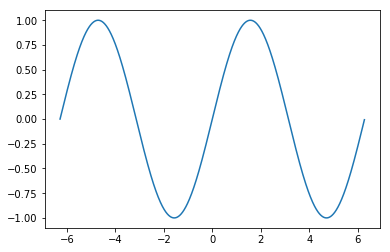

In [53]:
x = np.arange(-2*np.pi, 2*np.pi, 0.01)
y = np.sin(x)
plt.plot(x, y)

**Pro tip**: если вам кажется, что графики слишком маленькие, это можно немного подтюнить:

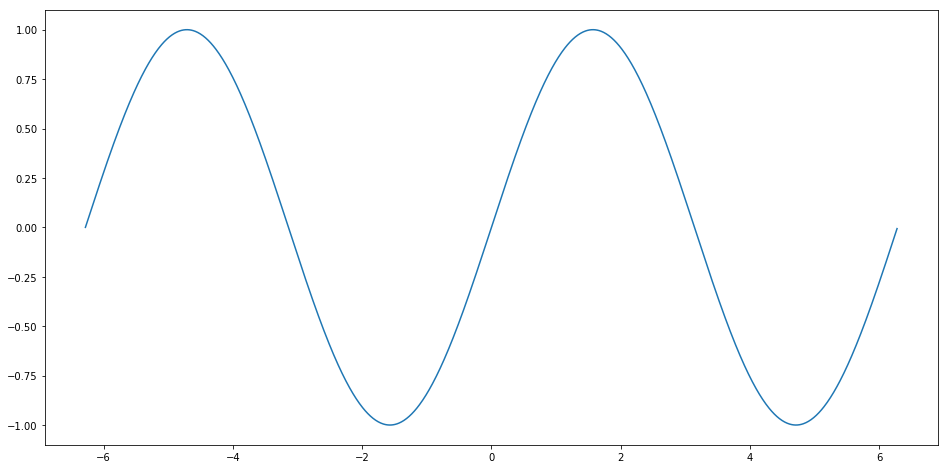

In [54]:
plt.figure(figsize=(16,8))
plt.plot(x,y)
plt.show() # чтобы не показывалось мерзкое сообщение
           # [<matplotlib.lines.Line2D at 0x7fa288a8e278>]

## Case study: Генерим данные для лабы
В задании вам будет предложено обработать данные из лабораторной работы, но сначала давайте их нагенерим. В качестве примера давайте возьмем затухающие колебания:

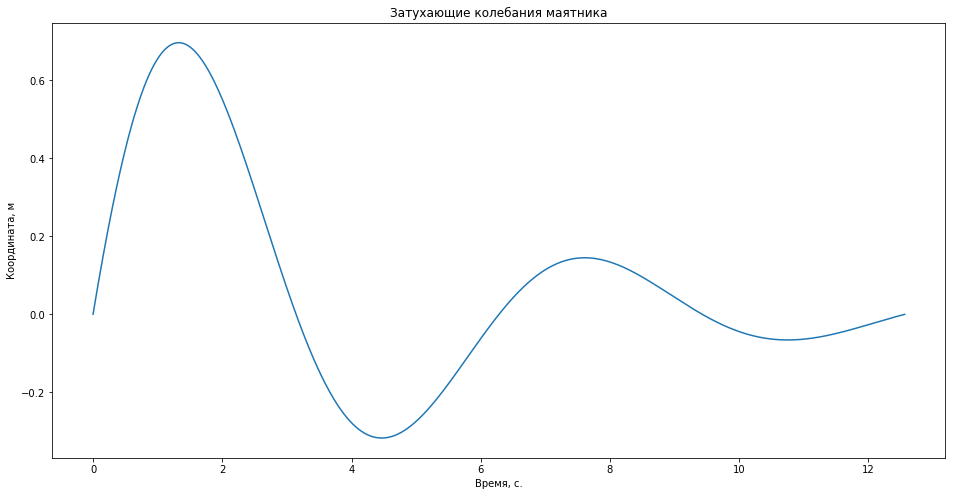

In [92]:
x = np.arange(0, 4*np.pi, 0.01)
y = np.sin(x)
y = y*np.exp(-x/4)

plt.figure(figsize=(16, 8))
plt.plot(x, y)

plt.title('Затухающие колебания маятника')
plt.ylabel('Координата, м') # у нас здоровый маятник
plt.xlabel('Время, с.')     # и видимо очень вязкая среда
plt.show()

Ну так не бывает! Давайте пошумим:

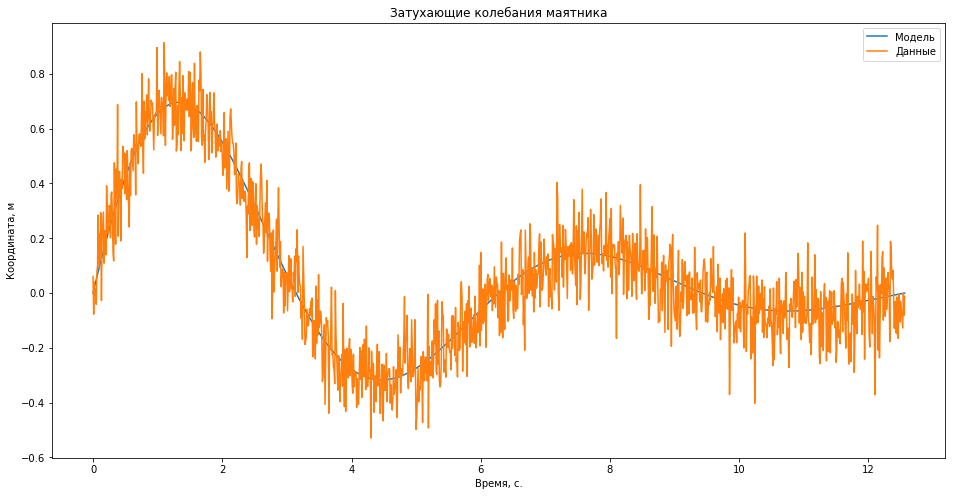

In [91]:
y1 = y + 0.1*np.random.randn(len(y)) # добавляем шум
                                     # почему не rand?  почему именно randn? подумойте
plt.figure(figsize=(16,8))
plt.plot(x, y, x, y1)

plt.title('Затухающие колебания маятника')
plt.ylabel('Координата, м')      
plt.xlabel('Время, с.')          
plt.legend(['Модель', 'Данные']) # будем хорошими мальчиками и сделаем легенду
plt.show()

Все хорошо, но не очень правдоподобно, у нас же нету стольких точек! Сейчас допилим:

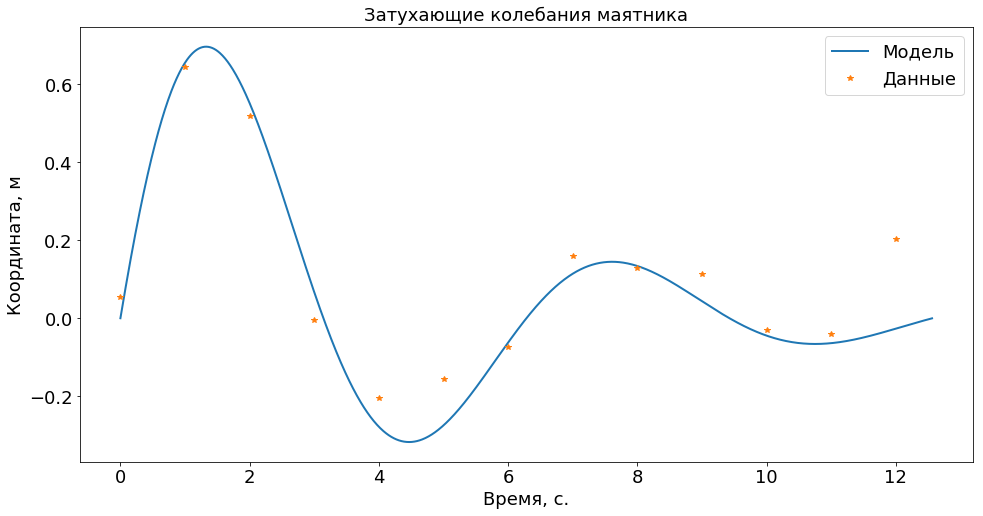

In [90]:
fig = plt.figure(figsize=(16,8))
plt.plot(x, y, linewidth=2)
plt.plot(x[::100],y1[::100], '*', linewidth=4) # берем каждую сотую точку

plt.title('Затухающие колебания маятника', fontsize=18) # еще сделаем подписи большим шрифтом
plt.ylabel('Координата, м', fontsize=18)     
plt.xlabel('Время, с.',fontsize=18)           
plt.legend(['Модель', 'Данные'], fontsize=18) 
ax=plt.gca()
ax.tick_params(labelsize=18)
plt.show()

## Мне скучно! Хочу еще что-нибудь почитать

* [PEP8](https://pythonworld.ru/osnovy/pep-8-rukovodstvo-po-napisaniyu-koda-na-python.html) - это руководство давно стало стандартом по написанию красивого и читаемого кода на питоне. Так же в `spyder` можно включить уведомления о том что вы пишете не по PEP8, а для `jupyter-notebook` есть [autopep8](https://anaconda.org/conda-forge/autopep8) который позволяет 'pep-нуть' куски кода (для его работы нужны [nbextensions](https://github.com/ipython-contrib/jupyter_contrib_nbextensions))